In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
#Read data for EDA
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')

train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

sample = pd.read_csv('/kaggle/input/ieee-fraud-detection/sample_submission.csv') 

In [3]:
#Show sub-datasets shape
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))


train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


In [4]:
#Categorical values
#train_transaction.select_dtypes(include=['object']).columns.tolist()
#train_identity.select_dtypes(include=['object']).columns.tolist()

Categorical features in Transaction:
* 'ProductCD',
*  'card4',
* 'card6',
* 'P_emaildomain',
* 'R_emaildomain',
* 'M1' - 'M9'

Categorical features in Identity:

* 'DeviceType'
* 'DeviceInfo'
* 'id_12 - id_38'

In [5]:
#How many percent of TransactionIDs occur in both transaction and identity
print(f"Train {(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique()))/train_transaction['TransactionID'].nunique() *100).round(2)}%")
print(f"Test {(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique()))/test_transaction['TransactionID'].nunique() *100).round(2)}%")


Train 24.42%
Test 28.01%


How much of all train transactions is fraud: 3.4990009144173126 % 



<AxesSubplot:xlabel='count', ylabel='isFraud'>

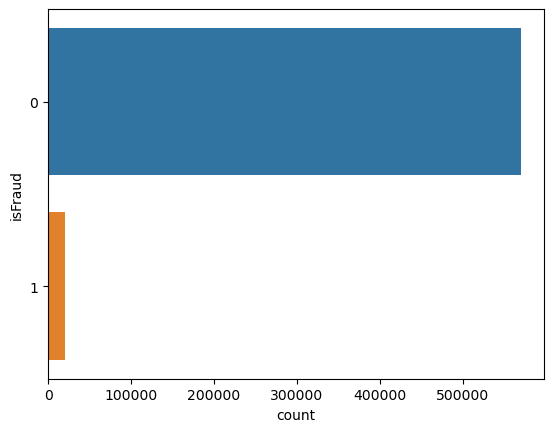

In [6]:
#Target data plot
print(f"How much of all train transactions is fraud: {train_transaction['isFraud'].mean() *100} % \n")
sns.countplot(y= 'isFraud',data= train_transaction)

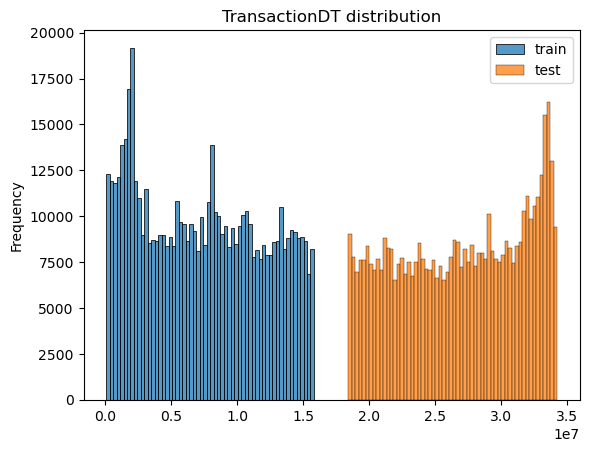

In [7]:
sns.histplot(x='TransactionDT', data= train_transaction, bins= 60, label= 'train').set(xlabel= ' ',ylabel='Frequency' ,title= 'TransactionDT distribution')
sns.histplot(x='TransactionDT', data= test_transaction, bins= 60, label= 'test')
plt.legend()

In [8]:
#Get info about 'TransactionAmt'
print(test_transaction['TransactionAmt'].describe())
print(train_transaction['TransactionAmt'].describe())

count    506691.000000
mean        134.725568
std         245.779822
min           0.018000
25%          40.000000
50%          67.950000
75%         125.000000
max       10270.000000
Name: TransactionAmt, dtype: float64
count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64


<AxesSubplot:title={'center':'TransactionDT distribution'}, xlabel=' ', ylabel='Frequency'>

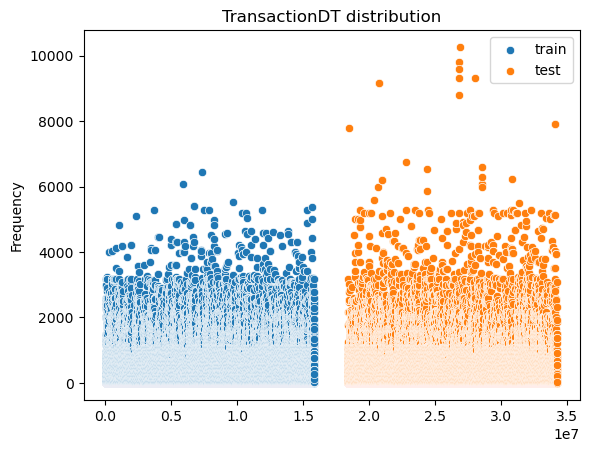

In [9]:
#Drop one too big value
train_transaction.drop(train_transaction[train_transaction['TransactionAmt'] > 25000].index, inplace= True )
sns.scatterplot(x='TransactionDT', y='TransactionAmt', data= train_transaction, label= 'train').set(xlabel= ' ',ylabel='Frequency' ,title= 'TransactionDT distribution')
sns.scatterplot(x='TransactionDT', y='TransactionAmt', data= test_transaction, label= 'test')

[Text(0, 0.5, ''), Text(0.5, 0, 'Count')]

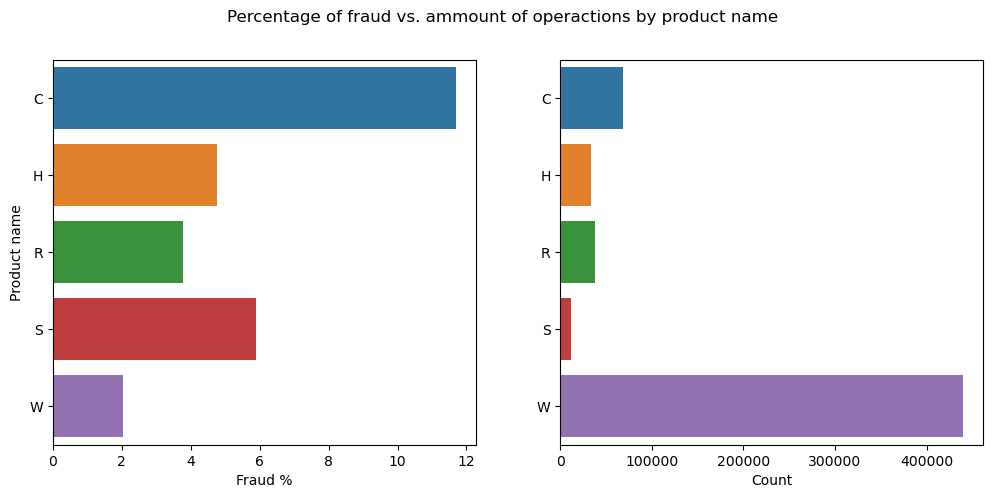

In [10]:
product_df = train_transaction.groupby('ProductCD')['isFraud'].mean().mul(100).reset_index()
product_df.columns = ['Product name', 'Fraud %']

fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Percentage of fraud vs. ammount of operactions by product name")
order = ['C', 'H', 'R', 'S', 'W']
sns.barplot(y = 'Product name', x= 'Fraud %', data = product_df, ax=ax[0], order= order)
sns.countplot(y = 'ProductCD', data = train_transaction, ax=ax[1], order= order).set(ylabel= "", xlabel= 'Count')

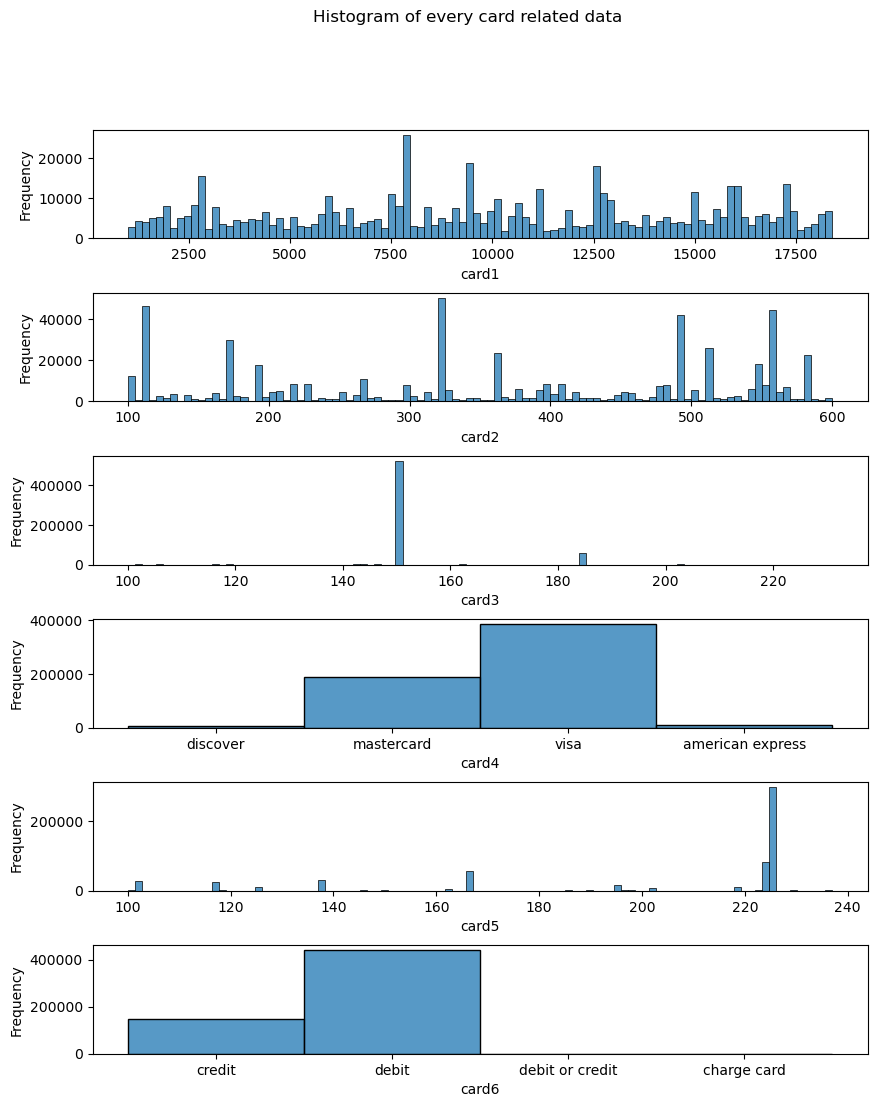

In [11]:
cards = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
fig, ax = plt.subplots(6,1, figsize = (10,12))
fig.suptitle("Histogram of every card related data")
plt.subplots_adjust(hspace = 0.5)
i= 0
for card in cards:
    sns.histplot(x= card, data= train_transaction, bins=100, ax= ax[i]).set(ylabel= 'Frequency')
    i+= 1

Text(0.5, 1.0, "Count of card's by type")

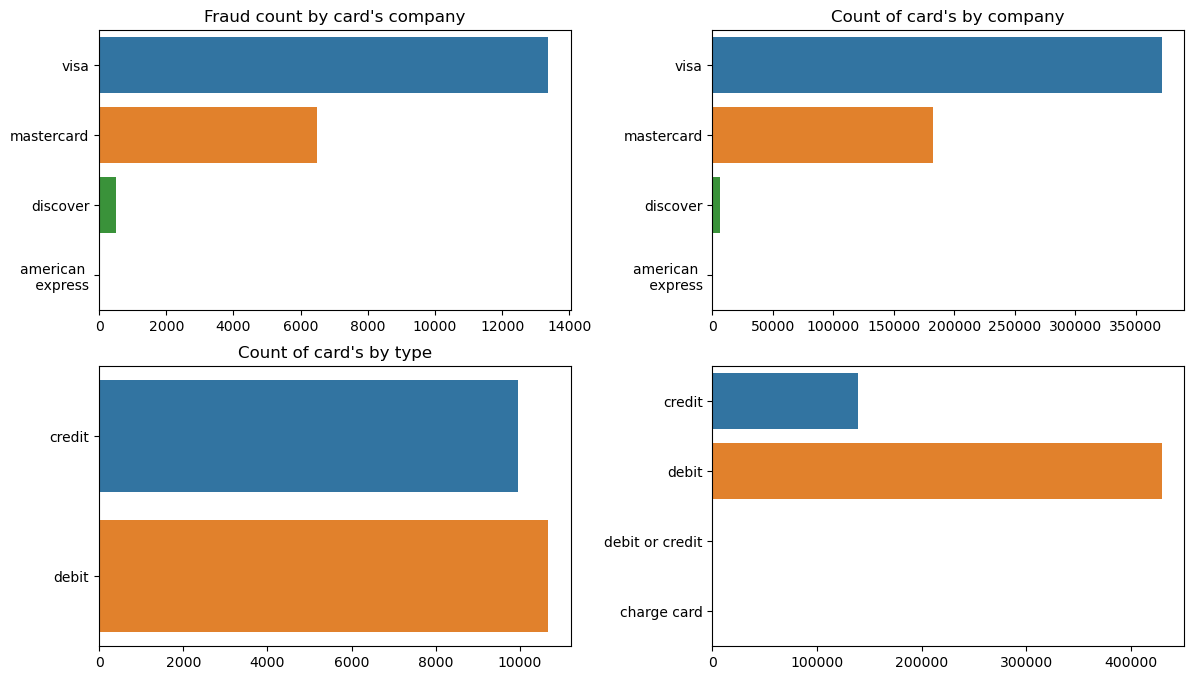

In [12]:
fig, ax = plt.subplots(2,2, figsize = (14,8))
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)
order= ['visa', 'mastercard', 'discover', 'american \n express']

sns.countplot(y= 'card4' ,data= train_transaction[train_transaction['isFraud'] == 1], ax= ax[0][0], order= order).set(ylabel= "", xlabel= "")
ax[0][0].set_title("Fraud count by card's company")
sns.countplot(y= 'card4' ,data= train_transaction[train_transaction['isFraud'] == 0], ax= ax[0][1], order= order).set(ylabel= "", xlabel= "")
ax[0][1].set_title("Count of card's by company")
sns.countplot(y= 'card6' ,data= train_transaction[train_transaction['isFraud'] == 1], ax= ax[1][0]).set(ylabel= "", xlabel= "")
ax[1][0].set_title("Fraud count by card's type")
sns.countplot(y= 'card6' ,data= train_transaction[train_transaction['isFraud'] == 0], ax= ax[1][1]).set(ylabel= "", xlabel= "")
ax[1][0].set_title("Count of card's by type")

# Feature engineering

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')


In [15]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [16]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [17]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test

False

In [18]:
cols_to_drop = list(set(many_null_cols + big_top_value_cols + one_value_cols))
cols_to_drop_test = list(set(many_null_cols_test + big_top_value_cols_test + one_value_cols_test))
cols_to_drop.remove('isFraud')

In [19]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop_test, axis=1)